In [22]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import random
from scipy.stats import norm

In [23]:

df= pd.read_csv('ventas.csv')

df.columns=df.columns.str.lower()
print(df.head())

        fecha       importe
0  01/01/2022    $8,315.50 
1  02/01/2022   $13,678.50 
2  03/01/2022    $3,087.00 
3  04/01/2022    $4,272.00 
4  05/01/2022     $3,883.50


# Data Clean

In [24]:
df['importe'] = df['importe'].str.replace(',', '')
df['importe'] = df['importe'].str.replace('$', '')
df['importe'] = pd.to_numeric(df['importe'])
df['fecha'] = pd.to_datetime(df['fecha'], format='%d/%m/%Y').dt.strftime('%Y-%m-%d')
#Convert to date-time  object
df['fecha'] = pd.to_datetime(df['fecha'], format='%Y-%m-%d')
print(df.head())


       fecha  importe
0 2022-01-01   8315.5
1 2022-01-02  13678.5
2 2022-01-03   3087.0
3 2022-01-04   4272.0
4 2022-01-05   3883.5


C:\Users\aguil\AppData\Local\Temp\ipykernel_23984\3214651919.py:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df['importe'] = df['importe'].str.replace('$', '')


#  Graph by month

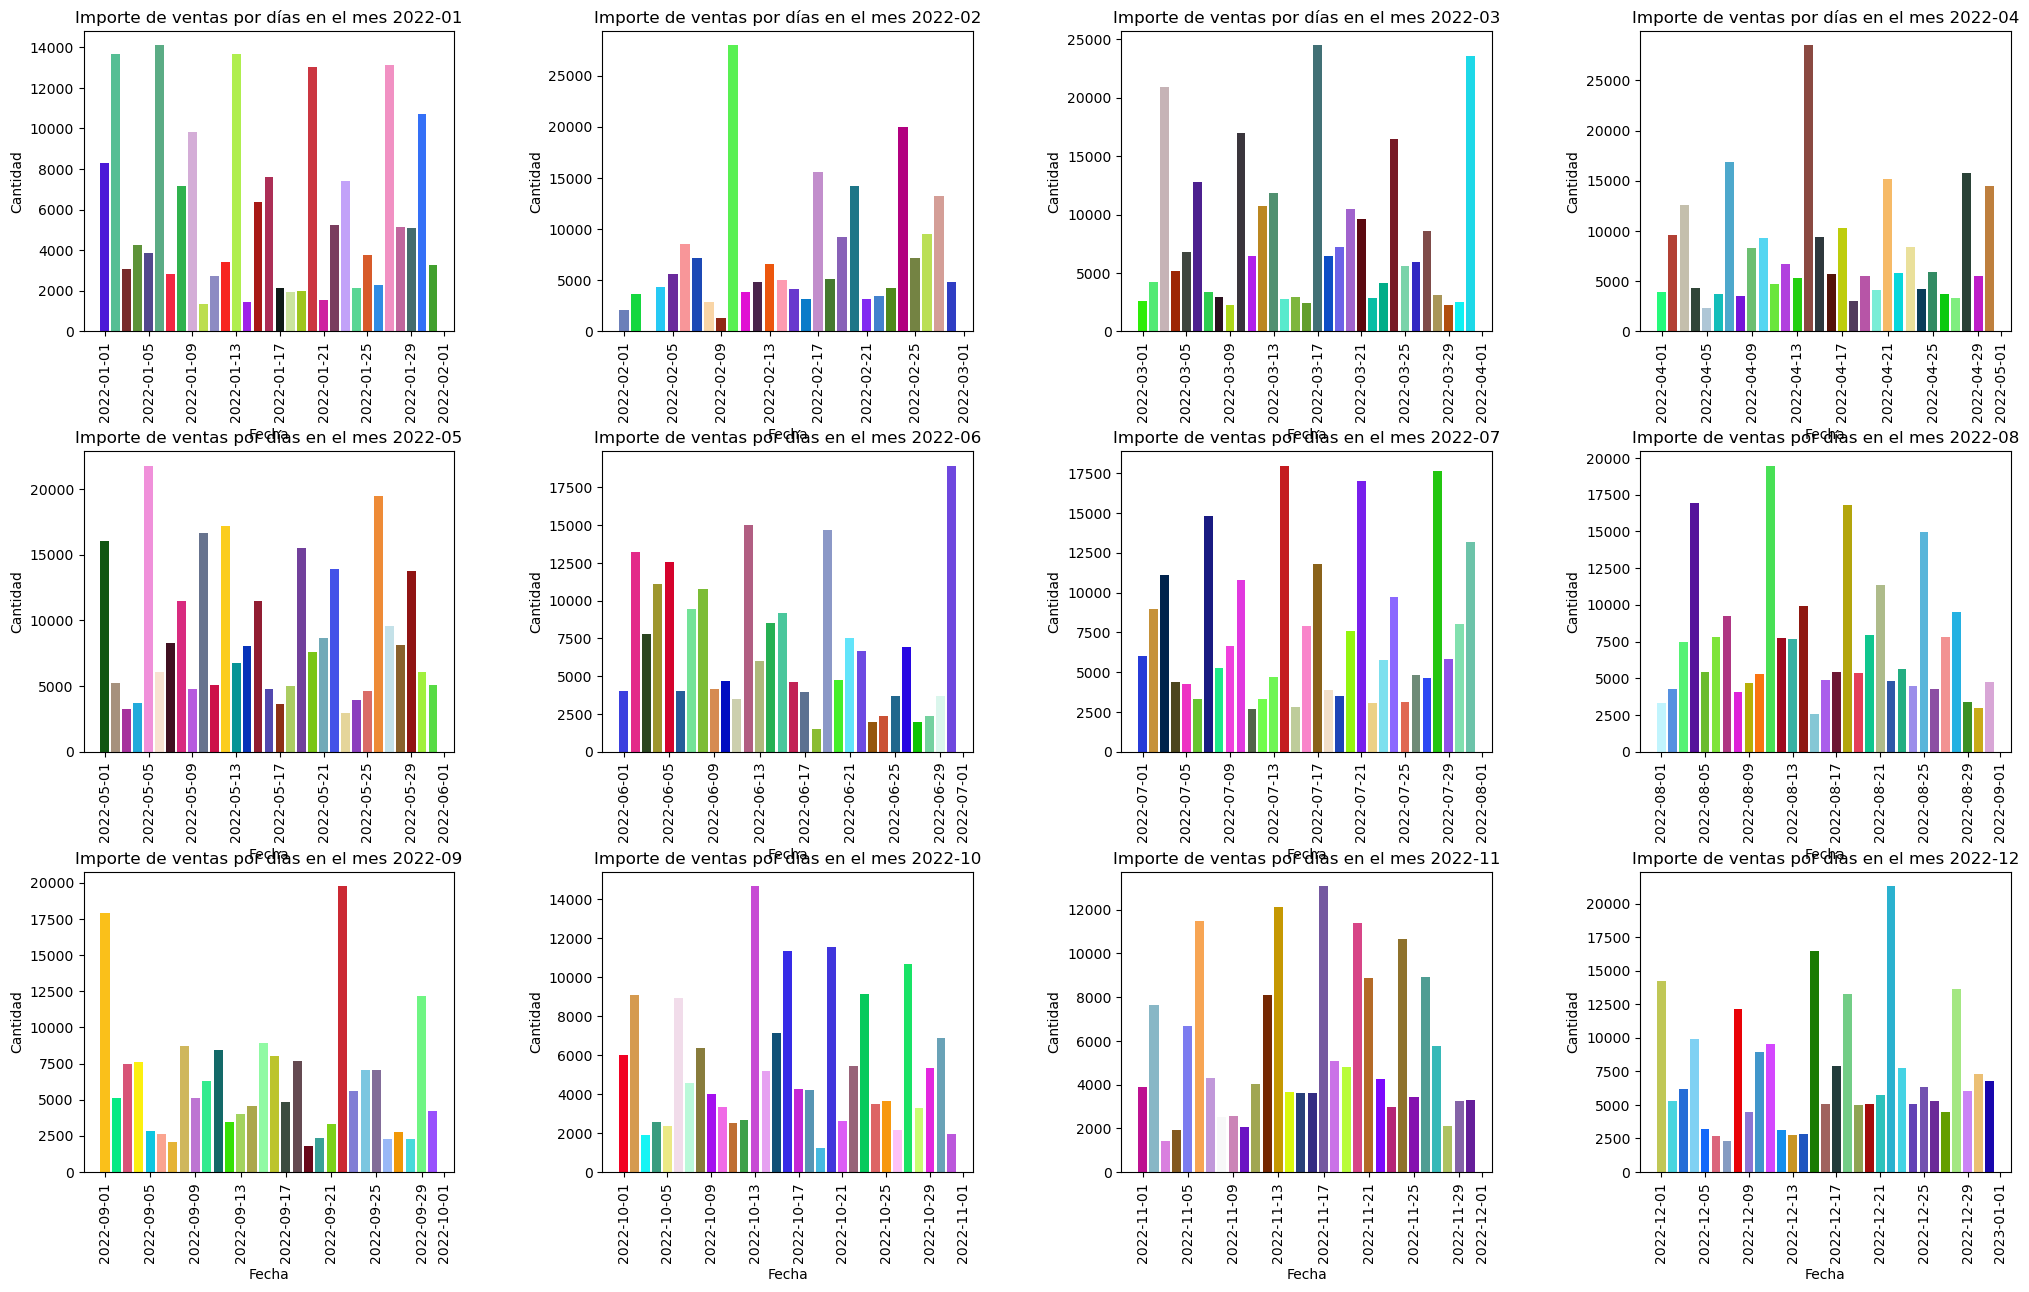

In [25]:
import random
import matplotlib.pyplot as plt

df['mes'] = df['fecha'].dt.to_period('M')
datos_agrupados = df.groupby(['mes', 'fecha'])['importe'].sum().reset_index()
#print(datos_agrupados)

def color_aleatorio():
    return (random.random(), random.random(), random.random())

num_filas = 3
num_columnas = 4

fig, axs = plt.subplots(num_filas, num_columnas, figsize=(20, 12))
fig.tight_layout()

# Adjust the space between rows and columns
plt.subplots_adjust(hspace=0.4, wspace=0.4)

meses_unicos = datos_agrupados['mes'].unique()

for i in range(num_filas):
    for j in range(num_columnas):
        index = i * num_columnas + j
        if index < len(meses_unicos):
            mes = meses_unicos[index]
            datos_mes = datos_agrupados[datos_agrupados['mes'] == mes]

            colores_barras = [color_aleatorio() for _ in range(len(datos_mes))]

            axs[i, j].bar(datos_mes['fecha'], datos_mes['importe'], color=colores_barras)
            axs[i, j].set_title(f'Importe de ventas por días en el mes {mes}')
            axs[i, j].set_xlabel('Fecha')
            axs[i, j].set_ylabel('Cantidad')
            axs[i, j].tick_params(axis='x', rotation=90)

plt.show()


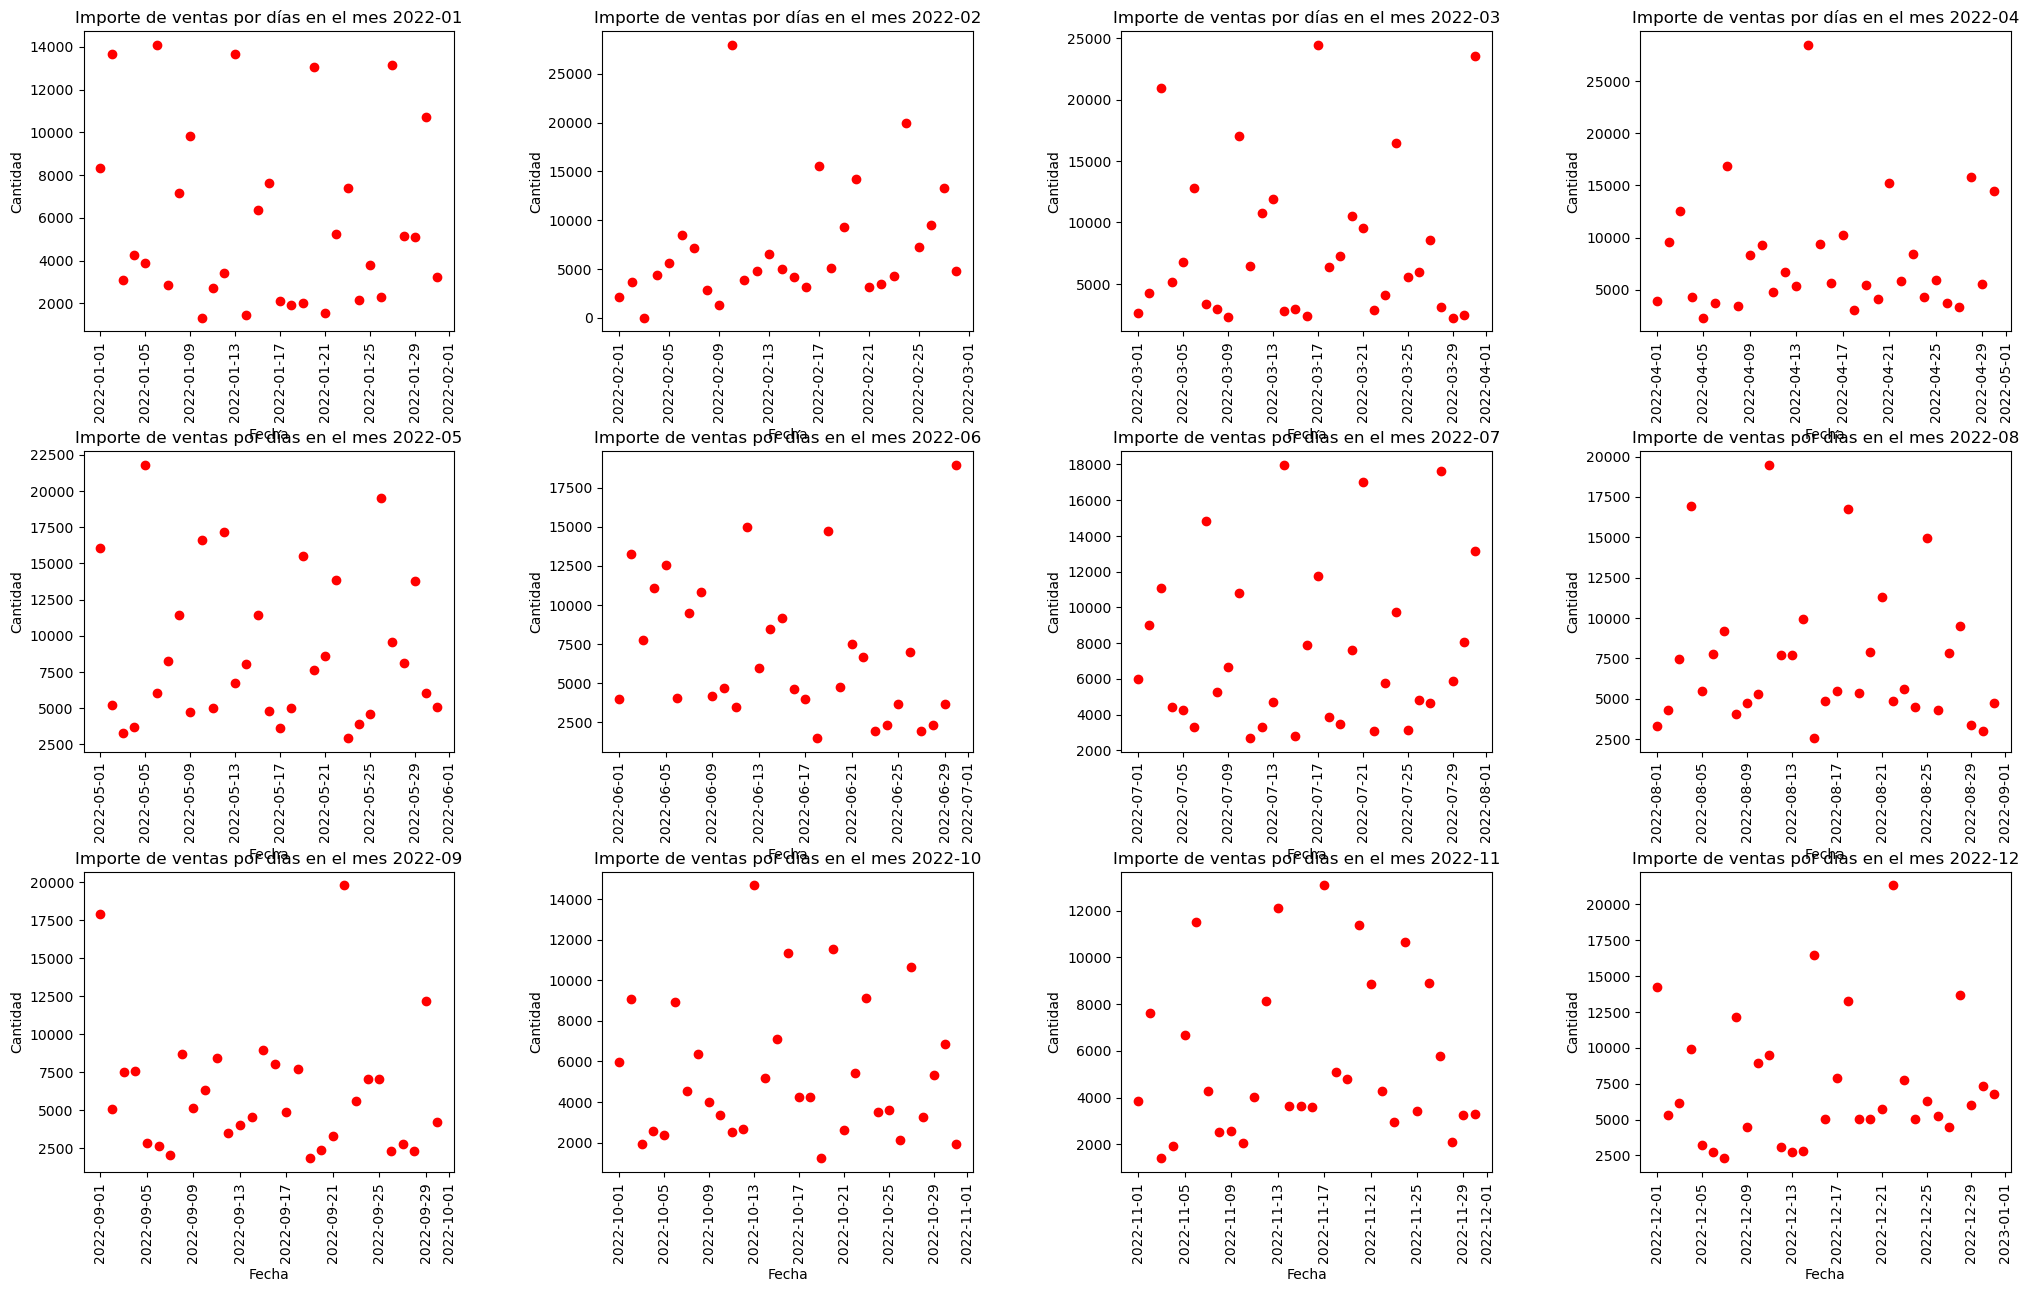

In [26]:
num_filas = 3
num_columnas = 4

fig, axs = plt.subplots(num_filas, num_columnas, figsize=(20, 12))
fig.tight_layout()

# Adjust the space between rows and columns
plt.subplots_adjust(hspace=0.4, wspace=0.4)

meses_unicos = datos_agrupados['mes'].unique()

for i in range(num_filas):
    for j in range(num_columnas):
        index = i * num_columnas + j
        if index < len(meses_unicos):
            mes = meses_unicos[index]
            datos_mes = datos_agrupados[datos_agrupados['mes'] == mes]

            # Create a scatterplot for each month of sale
            axs[i, j].scatter(datos_mes['fecha'], datos_mes['importe'], c='red', marker='o', zorder=2)
            
            axs[i, j].set_title(f'Importe de ventas por días en el mes {mes}')
            axs[i, j].set_xlabel('Fecha')
            axs[i, j].set_ylabel('Cantidad')
            axs[i, j].tick_params(axis='x', rotation=90)
        else:
            axs[i, j].axis('off')  # Ocultar ejes de gráficos vacíos

plt.show()

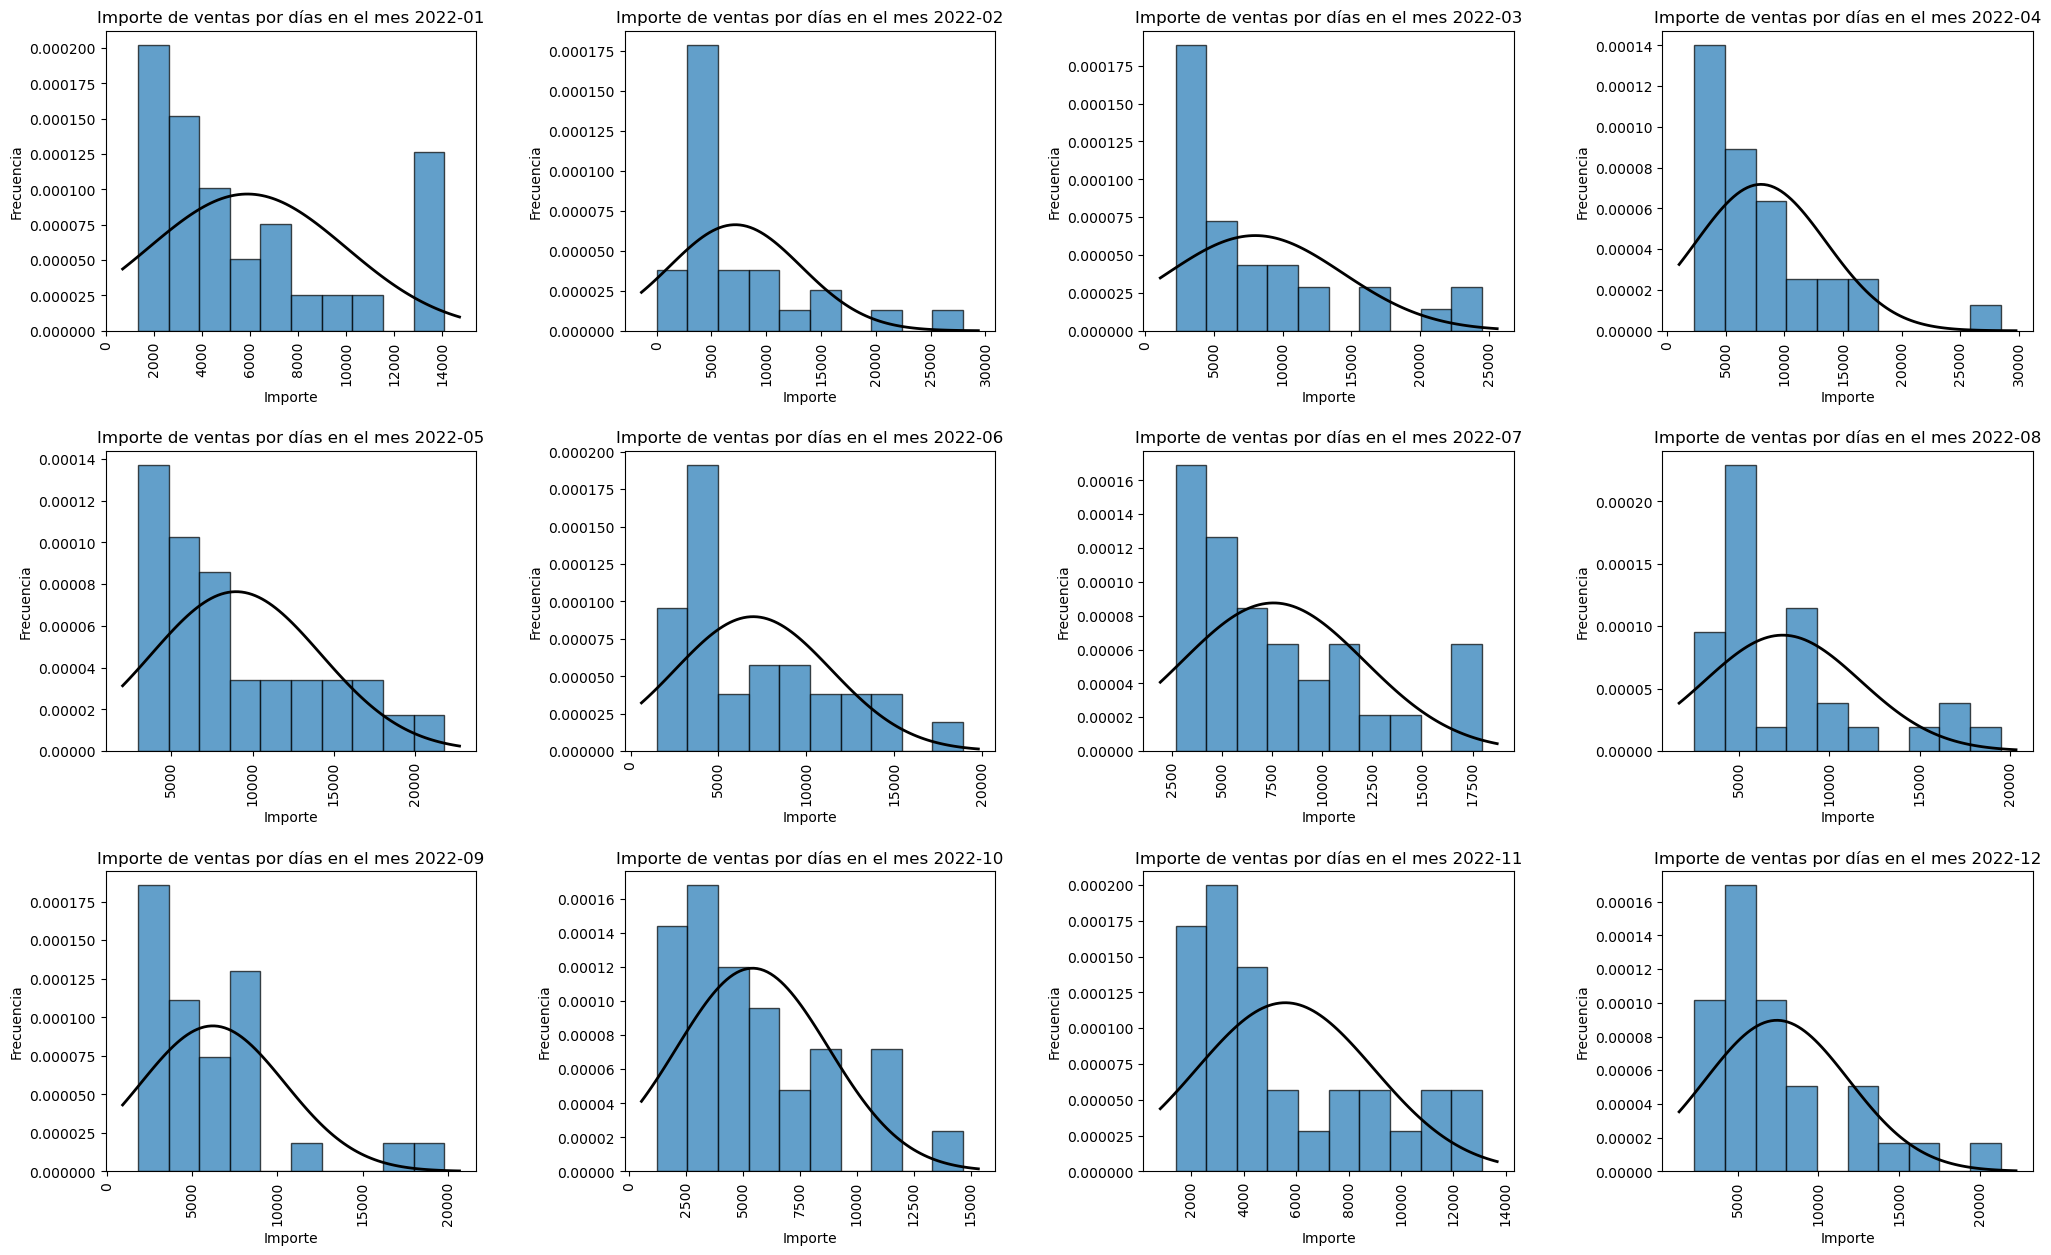

In [27]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

num_filas = 3
num_columnas = 4

fig, axs = plt.subplots(num_filas, num_columnas, figsize=(20, 12))
fig.tight_layout()

#Adjust the space between rows and columns
plt.subplots_adjust(hspace=0.4, wspace=0.4)

meses_unicos = datos_agrupados['mes'].unique()

for i in range(num_filas):
    for j in range(num_columnas):
        index = i * num_columnas + j
        if index < len(meses_unicos):
            mes = meses_unicos[index]
            datos_mes = datos_agrupados[datos_agrupados['mes'] == mes]

            #Create a histogram for each month of sales
            axs[i, j].hist(datos_mes['importe'], bins=10, edgecolor='black', alpha=0.7, density=True)
            
            # Calculate and plot the probability density curve
            mu, std = norm.fit(datos_mes['importe'])
            xmin, xmax = axs[i, j].get_xlim()
            x = np.linspace(xmin, xmax, 100)
            p = norm.pdf(x, mu, std)
            axs[i, j].plot(x, p, 'k', linewidth=2)
            
            axs[i, j].set_title(f'Importe de ventas por días en el mes {mes}')
            axs[i, j].set_xlabel('Importe')
            axs[i, j].set_ylabel('Frecuencia')
            axs[i, j].tick_params(axis='x', rotation=90)
        else:
            axs[i, j].axis('off')  # Ocultar ejes de gráficos vacíos

plt.show()



In [28]:
for mes in meses_unicos:
    datos_mes=datos_agrupados[datos_agrupados['mes']==mes]
    std_month=datos_mes['importe'].std(ddof=0)
    #print(f'La desviación estandard del mes {mes} es: {std_month}')

In [29]:
for mes in meses_unicos:
    datos_mes=datos_agrupados[datos_agrupados['mes']==mes]
    mean_month=datos_mes['importe'].mean()
    #print(f'La media del mes {mes} es: {mean_month}')

In [30]:

for mes in meses_unicos:
    datos_mes=datos_agrupados[datos_agrupados['mes']==mes]
    Q1=datos_mes['importe'].quantile(0.25)
    Q3=datos_mes['importe'].quantile(0.75)
    IQR = Q3 - Q1
    datos_mes_filtrados=datos_mes[(datos_mes['importe']>= Q1 -1.5 * IQR) & (datos_mes['importe']<=Q3+1.5*IQR)]
    mean_filtrado=datos_mes_filtrados['importe'].mean()
    #print(f'La media sin valores atipicos es: {mean_filtrado}')

In [31]:
for mes in meses_unicos:
    datos_mes = datos_agrupados[datos_agrupados['mes'] == mes]
    
    mean_month = datos_mes['importe'].mean()
    
    Q1 = datos_mes['importe'].quantile(0.25)
    Q3 = datos_mes['importe'].quantile(0.75)
    IQR = Q3 - Q1

    datos_mes_filtrados = datos_mes[(datos_mes['importe'] >= Q1 - 1.5 * IQR) & (datos_mes['importe'] <= Q3 + 1.5 * IQR)]
    mean_filtrado = datos_mes_filtrados['importe'].mean()
    
    diferencia = mean_month - mean_filtrado
    porcentaje_diferencia = (diferencia / mean_month) * 100
    
    #print(f'La diferencia en porcentaje entre la media original y la media filtrada del mes {mes} es: {porcentaje_diferencia:.2f}%')


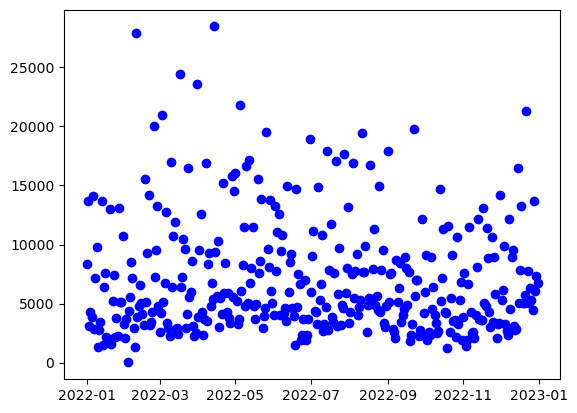

In [32]:
plt.scatter(df['fecha'], df['importe'], c='blue', marker='o', zorder=2)

# Multiple Linear Regression 

### Dummy Variables

In [33]:


df_day=pd.DataFrame(df['fecha'])
df_day['importe']=df['importe']
df_day['dia']=df_day['fecha'].dt.day_name()

dummy_days=pd.get_dummies(df_day['dia'])
ordered_days=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

dummy_days = dummy_days[ordered_days]
df_day.drop('dia',axis=1,inplace=True)

df_day=pd.concat([df_day,dummy_days],axis=1)

print(df_day)

         fecha     importe  Monday  Tuesday  Wednesday  Thursday  Friday  \
0   2022-01-01     8315.50       0        0          0         0       0   
1   2022-01-02    13678.50       0        0          0         0       0   
2   2022-01-03     3087.00       1        0          0         0       0   
3   2022-01-04     4272.00       0        1          0         0       0   
4   2022-01-05     3883.50       0        0          1         0       0   
..         ...         ...     ...      ...        ...       ...     ...   
361 2022-12-28    13662.00       0        0          1         0       0   
362 2022-12-29     6050.00       0        0          0         1       0   
363 2022-12-30     7314.00       0        0          0         0       1   
364 2022-12-31     6777.00       0        0          0         0       0   
365        NaT  2576863.16       0        0          0         0       0   

     Saturday  Sunday  
0           1       0  
1           0       1  
2           0  

In [41]:
df_day['mes'] = df_day['fecha'].dt.month
df_enero = df_day[df_day['mes'] == 1].drop('mes', axis=1)
df_enero


,fecha,importe,Monday,Tuesday,Wednesday,Thursday,Friday,Saturday,Sunday
0,2022-01-01,8315.5,0,0,0,0,0,1,0
1,2022-01-02,13678.5,0,0,0,0,0,0,1
2,2022-01-03,3087.0,1,0,0,0,0,0,0
3,2022-01-04,4272.0,0,1,0,0,0,0,0
4,2022-01-05,3883.5,0,0,1,0,0,0,0
5,2022-01-06,14090.0,0,0,0,1,0,0,0
6,2022-01-07,2852.0,0,0,0,0,1,0,0
7,2022-01-08,7154.0,0,0,0,0,0,1,0
8,2022-01-09,9817.5,0,0,0,0,0,0,1
9,2022-01-10,1329.0,1,0,0,0,0,0,0


In [35]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Create the X and Y variables
X = df_enero[ordered_days]
y = df_enero['importe']


#Multiple linear regression model
model = LinearRegression()
model.fit(X, y)

# Make predictions and calculate evaluation metrics
y_pred = model.predict(X)
mse = mean_squared_error(y, y_pred)
r2 = r2_score(y, y_pred)

print("coefficients:", model.coef_)
print("interception:", model.intercept_)
print("MSE:", mse)
print("R^2:", r2)


Coeficientes: [1.44590224e+18 1.44590224e+18 1.44590224e+18 1.44590224e+18
 1.44590224e+18 1.44590224e+18 1.44590224e+18]
Intercepción: -1.4459022416532165e+18
MSE: 1778487.6370967743
R^2: 0.8954774663091499


C:\Users\aguil\AppData\Local\Temp\ipykernel_23984\2470507044.py:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = df_enero.corr()


<Axes: >

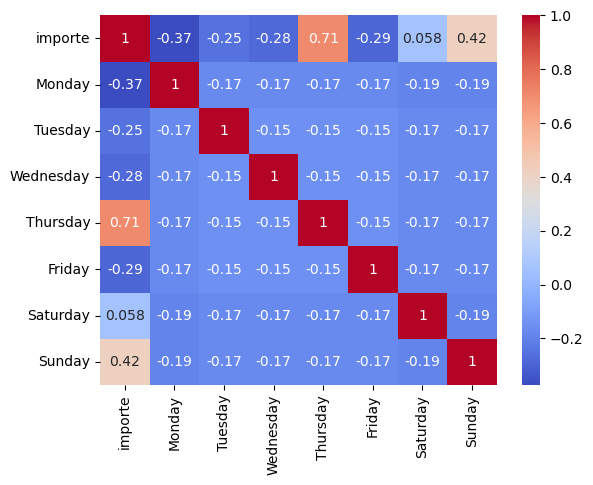

In [37]:
import seaborn as sns


corr_matrix = df_enero.corr()


sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')


<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=10656f0c-5560-4386-a8bd-10a3d72c1780' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>